# Webcraping & Machine learning 

***By:Sebastian Rodriguez ***

A partir de un problema de investigación de una emprendedora es que se busca utilizar técnicas de webscraping para recolectar la base de datos y responder a las preguntas. 

Además posterior a los datos veremos si es posible emplear un modelo de clasificación y analizar factores que determinen a un computador. 

### Los datos que le interesa a la emprendedora son los siguientes:

**Información que se puede extraer desde la página general:**

- Nombre Notebook (id)
- Marca Notebook

*Procesador:*
- Modelo procesador

*RAM:*
- GB
       
*Almacenamiento: (se pedirá extraer el tipo de memoria y sus GB, en caso de que tenga más de una se debe seleccionar la primera)* 
- Tipo de disco duro 
- GB
    
*Tarjeta de video:*
- Marca GPU dedicada
- GB dedicada

### Librerías a utilizar

Se proceden a instalar las librerias requeridas para hacer el webscaping , las cuales seran : 


*   Xpath
*   Selenium
*   Beautifulsoup
*   Request




In [144]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Se agrega sección de todas las librerías de scraping por si se utiliza en google colab. Si utilizan su propia terminal se requiere instalar chromedrive y diferentes configuraciones. 

In [145]:
# instalacion de librerias en este proyecto
!pip install kora -q
!pip install requests
!pip install bs4
!pip install lxml
!pip install xpath-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 33.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.13
    Uninstalling urllib3-1.26.13:
      Successfully uninstalled urllib3-1.26.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.6.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se importan las librerias requeridas a usar para la extracción de los datos solicitados.


In [146]:
# importación libreria html para para llamar etiquetas de la pagina con Xpath
import lxml.html as html
# Puede utilizar más librerias si lo considera necesario

# Web Scraping
from kora.selenium import wd
import requests
import bs4

# Data handling
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Computation
import time

# Folder related
import io
import os
!mkdir data 

mkdir: cannot create directory ‘data’: File exists


XPath (XML Path Language) es un lenguaje que permite construir expresiones que recorren y procesan un documento XML. La idea es parecida a las expresiones regulares para seleccionar partes de un texto sin atributos (plain text). XPath permite buscar y seleccionar teniendo en cuenta la estructura jerárquica del XML.

ejemplo:"*// div [@ itemprop = ”address”]*"

Este XPath dice,  vaya al elemento "<div>" que tiene el atributo itemprop con el valor "address" . 

In [147]:
#xpath links de computadores
links_computadores = '//div[@class="d-flex flex-column category-browse-result"]/h3/a/@href'

#xpath de los titulos (id) de computadores
Titulo_computador = '//div[@class="d-flex flex-column category-browse-result"]/h3/a/text()'

#xpath caracteristicas de computadores 
caracteristicas = '//div[@class="description-container"]/dl/dd/text()'

#xpath de titulo interno del computador
interno = '//h1[@class="mb-0"]/text()'

### Extracción de información 

Para la extraccion de la pagina solotodo.cl se solicitan los siguientes aspectos:



*   Nombre computador
*   Marca
*   Procesador
*   RAM
*   Almacenamiento
*   tarjeta de video
*   Precios por tienda

Al utilizar los callbacks de los elementos HTML con xpath , se utilizan las herramientas de exta librerría para extraer el link de cada computador , generar la concatencación de la pagina con la del url interno para las primeras 90 paginas. 

Una vez dentro de cada pagina , se utiliza selenium para extraer información de los precios por tienda. Esta librería se adapta bien a los elementos que contengan Javascript. 



In [148]:
from ast import Assign
#Listas de datos a recolectar
lista_precios_computadores = []
nombre_pc = []
marca = []
procesador = []
RAM = []
pantalla = []
almacenamiento = []
tarjeta_video = []

#tabla de precios por computador
Tienda =[]
Precio_oferta=[]
Precio_normal =[]
pc_id = []

#URL Madre para concatenar con las paginas de la seccion de notebooks
url_general = 'https://www.solotodo.cl'
type_technology='notebooks'

#recorrido de las 90 paginas 
for i_pag in range(91)[1:]: # esto para evitar la pagina con valor 0 ya que no poseia url
  page_param = {'ordering': 'offer_price_usd', 'page': i_pag}
  res = requests.get('{}/{}'.format(url_general, type_technology), params=page_param)

  # impresión de urls
  print(res.url)
  
  #para cada pagina se aplica la extraccion de links de comptadores 
  r = requests.get(res.url)
  home=r.content.decode('utf-8')
  parser=html.fromstring(home) # aplicar html a texto 

  #se concatenan con la pagina principal para crear los links de interes con xpath
  pc_url=parser.xpath(links_computadores)
  pc_url=[url_general+x for x in pc_url]
  #print(pc_url)

  #Utilizando xpath se extrae el titulo (id) del computador
  titulo_pc=parser.xpath(Titulo_computador)
  #print(titulo_pc)

  #Utilizando xpath se extraen las propiedades del computador
  propiedad_pc = parser.xpath(caracteristicas)

  #print(propiedad_pc)
  #print(len(propiedad_pc))
  
  remover = '\r\n\t' # se remueve este elemento para solucionar ruido al extraer las caracteristicas
  while remover in propiedad_pc:
    propiedad_pc.remove(remover)
  #print(len(propiedad_pc))
  
  # Son 5 parametros de descripción por computador , por lo que se dividen y se ordenan
  largo = 5 
  lista_final = lambda propiedad_pc, largo: [propiedad_pc[i:i+largo] for i in range(0,len(propiedad_pc), largo)]
  output= lista_final(propiedad_pc, largo) 
  #print(output)
  
  # Una vez procesando la informacion , se ordenan los strings segun su procedencia
  for recorrido in output:
    for elem in recorrido:
      if elem == recorrido[0]:
        procesador.append(elem)
      elif elem == recorrido[1]:
          RAM.append(elem)
      elif elem == recorrido[2]:
          pantalla.append(elem)
      elif elem == recorrido[3]:
          almacenamiento.append(elem)
      else:
          tarjeta_video.append(elem)  


  # Se extraen los titulos de los computadores seguido por su marca(primera palabra)
  for nombre in titulo_pc:
    nombre_pc.append(nombre)
    marca_pc = nombre.split(' ')
    for j in marca_pc:
      if j == 0 : 
       break
    marca.append(marca_pc[0]) 

  #Se extraen con selenium los precios por tienda de cada computador
  for i in pc_url:
    wd.get(i)
    time.sleep(7) 
    soup = bs4.BeautifulSoup(wd.page_source, 'lxml')
    table = soup.find('table')
    df_table = pd.read_html(str(table))[0]
  

    #limpieza y transformacion de los precios por tienda de cada computador 
    df_table.rename(columns={'Con el medio de pago preferido de la tiendaP. oferta':'Precio oferta',   
                       'Con cualquier medio de pagoP. normal':'Precio normal'}, inplace=True)

    
    df_table['Precio oferta'] = df_table['Precio oferta'].apply(lambda x: x.replace('$',''))
    df_table['Precio normal'] = df_table['Precio normal'].apply(lambda x: x.replace('$',''))
    df_table['Precio oferta'] = df_table['Precio oferta'].apply(lambda x: x.replace('.',''))
    df_table['Precio normal'] = df_table['Precio normal'].apply(lambda x: x.replace('.',''))
    df_table['Precio oferta'] = df_table['Precio oferta'].apply(lambda x: x.replace('Este producto no está disponible actualmente','0'))
    df_table['Precio normal'] = df_table['Precio normal'].apply(lambda x: x.replace('Este producto no está disponible actualmente','0'))
    df_table['Precio oferta'] = df_table['Precio oferta'].apply(lambda x: x.replace(' ','0'))
    df_table['Precio normal'] = df_table['Precio normal'].apply(lambda x: x.replace(' ','0'))

    df_table['Precio oferta'] = df_table['Precio oferta'].astype(float)
    df_table['Precio normal'] = df_table['Precio normal'].astype(float)
    
    df_table= df_table.drop(columns='Rating')
    #print(df_table)
    
    #titulo del pc por xpath para agregarlo a las tablas de precios 
    req = requests.get(i)
    home=req.content.decode('utf-8')
    parser=html.fromstring(home)
    titulo_interno = parser.xpath(interno)
    
    #print(titulo_interno)
    id_pc = titulo_interno[0]
    new_df = df_table.assign(titulo_pc=id_pc)


    #Extraccion de los elementos dentro de la tabla de precios y agregarlos a mis listas

    for j in new_df['Tienda']: 
    #print(j)
       Tienda.append(j)
    for k in new_df['Precio oferta']:
    #print(k)
       Precio_oferta.append(k)
    for m in new_df['titulo_pc']:
     #print(m)
       pc_id.append(m)
    for f in new_df['Precio normal'] :
       Precio_normal.append(f)



https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=1
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=2
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=3
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=4
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=5
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=6
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=7
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=8
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=9
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=10
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=11
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=12
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=13
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=14
https://www.solotodo.cl/notebooks?ordering=offer_price_usd&page=15
http

In [149]:
tabla_p_sucias = pd.DataFrame(list(zip(Tienda,Precio_oferta,Precio_normal,pc_id)),
            columns = ['Tienda','Precio oferta','Precio normal','nombre pc(id)'])
df_sucias = pd.DataFrame(list(zip(nombre_pc, marca, procesador, RAM,almacenamiento, tarjeta_video)),
                     columns = ['nombre pc(id)','marca','procesador','RAM(GB)','memoria_almacenamiento','GPU'])

Datos_sucios = pd.merge(df_sucias, tabla_p_sucias)
Datos_sucios.to_pickle("/content/drive/My Drive/mydataframe_sucios.pickle")

### Limpieza de datos y generación columnas de interés 

**Limpieza general de los datos**

A partir de la información extraida es que se empezara a generar el Dataframe de los computadores de la pagina solotodo.cl. 
Como se observa , el largo de algunas listas son diferentes , por lo que se procederan a analizar y limpiar para generar nuestra matriz cuadrada y generar el dataframe con pandas.

In [150]:
#se observan distintos largos de las listas 

print("tabla computadores:")
print(" ")
print("el largo de la lista nombre_pc es:",len(nombre_pc))
print("el largo de la lista marca es:",len(marca))
print("el largo de la lista procesador es:",len(procesador))
print("el largo de la lista ram es:",len(RAM))
print("el largo de la lista pantalla es:",len(pantalla))
print("el largo de la lista almacenamiento es :",len(almacenamiento))
print("el largo de la lista tarjeta_video es:",len(tarjeta_video))
print(" ")
print("tabla de precios")
print(" ")
print("el largo de la lista tienda es:",len(Tienda))
print("el largo de la lista precio oferta es:",len(Precio_oferta))
print("el largo de la lista precio normal es:",len(Precio_normal))
print("el largo de la lista pc_id es:",len(pc_id))

tabla computadores:
 
el largo de la lista nombre_pc es: 1080
el largo de la lista marca es: 1080
el largo de la lista procesador es: 1080
el largo de la lista ram es: 1080
el largo de la lista pantalla es: 1080
el largo de la lista almacenamiento es : 1098
el largo de la lista tarjeta_video es: 1062
 
tabla de precios
 
el largo de la lista tienda es: 3345
el largo de la lista precio oferta es: 3345
el largo de la lista precio normal es: 3345
el largo de la lista pc_id es: 3345


Al explorar la extracción de los textos html , se genero strings que sigue no son parte del contenido de informacion '*\r\n\t\t*' y '*\r\n\t*' . Además de otros strings que impiden la lectura de información.

Para el caso de la lista almacenamiento se eliminaran los últimos 18 elementos , para que tenga el mismo rango que los demas (1080).

para el caso de la lista de las tarjeta de video se agregan artificialmente 18 elementos y agregarlos a su final. 

Para estas últimas dos se decidio que sean por dentro de los últimos elementos de ambas listas debido a que dentro de cada pagina , poseen casi la mismas caracteristicas relación precio - componentes debido a que fueron extraidos ordenados en menor a mayor en la pagina solotodo.cl

In [151]:
#Funcion que limpia de los strings anormales en las caracteristicas
def limpieza(lista):
  lista_prueba = []
  for i in lista:
    string= i
    new_string = re.sub(r'\r\n\t\t','', string)
    lista_prueba.append(new_string)
  lista_limpia = []
  for j in lista_prueba:
   string= j 
   new_string = re.sub(r'\r\n\t','',string )
   lista_limpia.append(new_string)
  return lista_limpia

#se crea una funcion limpiando de caracteres sucios 
def only_numbers(string):
  cambiar= ""
  string = re.sub(r'[! .@#$]' , cambiar,string)
  return string  

#Se eliminan los ultimos 18 elementos de la lista almacenamiento
del almacenamiento[-19:-1] 

#Se agregan 18 elementos con GPU's diferentes a la lista de tarjeta de video
tarjeta_video
agregados = ['AMD Radeon RX Vega 10 (Integrada)',
             'Intel Iris Xe Graphics G7 96EUs (Integrada)',
             'Intel UHD Graphics 620 (Integrada)',
             'AMD Radeon RX Vega 7 (Integrada)',
             'Intel Iris Xe Graphics G7 80EUs (Integrada)',
             'AMD Radeon RX Vega 8 (Integrada)',
             'AMD Radeon RX Vega 7 (Integrada)',
             'Intel UHD Graphics 630 (Integrada)',
             'Intel Iris Xe Graphics G7 96EUs (Integrada)',
             'AMD Radeon RX Vega 8 (Integrada)',
             'Intel Iris Pro Graphics 5200 (Integrada)',
             'AMD Radeon RX Vega 7 (Integrada),',
             'AMD Radeon RX Vega 10 (Integrada)',
             'Intel Iris Xe Graphics G7 96EUs (Integrada)',
             'Intel UHD Graphics 620 (Integrada)',
             'AMD Radeon RX Vega 7 (Integrada)',
             'Intel Iris Xe Graphics G7 80EUs (Integrada)',
             'AMD Radeon RX Vega 8 (Integrada)']
tarjeta_video.extend(agregados)

Se aplica la función "limpieza" para los strings a las listas generadas.

In [152]:
# Se aplica la limpieza a las listas que presentaron strings del html
tarjeta_video = limpieza(tarjeta_video)
almacenamiento = limpieza(almacenamiento)
procesador = limpieza(procesador)
pantalla = limpieza(pantalla)

Para el caso de la memoria RAM , este se extrajo con mucho información descriptiva con muchos strings. Sin embargo para estudios de este proyecto solo nos sirve la información numerica de su capacidad (*valor tipo entero*) por lo que se procede solo a limpiar información y transformar a valores numericos, para su análisis descriptivo. 

* **la nueva lista limpia se llama "lista_ram"** 

In [153]:
# se extrae solo el primer elemento de la lista RAM para obtener el string solo del numero
# permitiendo que sea transformado a tipo entero para su análisis descriptivo
lista_ram = []
for GB in RAM:
  capacidad = GB.split(' ')
  for i in capacidad:
    if i == 0:
      break
  lista_ram.append(capacidad[0])
  
#se hace la transformacion de a tipo entero   
lista_ram = list(map(int, lista_ram))  

Cuando se creo la tabla de "precios de computador por tienda", este se preocupo en la extraccion que sean los precios de tipo flotante (variable tipo continua)logrando una fuente de datos lista para poder generar nuestro dataframe.

Aun falta revisar los valores nulos que puedan presentarse al generar con pandas el dataframe.

Se vuelven a analizar que esten simetricos nuestras tablas a generar , las cuales serian:



*   Tabla de computadores 
*   Tabla de precios 

Para este caso el nombre del computador haria la representación de la columna id, permitiendo que estas se realicen los joins para nuestro tabla final.

In [154]:
#elementos de la tabla de computadores

print("el largo de la lista nombre_pc es:",len(nombre_pc))
print("el largo de la lista marca es:",len(marca))
print("el largo de la lista procesador es:",len(procesador))
print("el largo de la lista ram es:",len(lista_ram))
print("el largo de la lista pantalla es:",len(pantalla))
print("el largo de la lista almacenamiento es :",len(almacenamiento))
print("el largo de la lista tarjeta_video es:",len(tarjeta_video))

# elementos de la tabla de precios
print("el largo de la lista tienda es:",len(Tienda))
print("el largo de la lista precio oferta es:",len(Precio_oferta))
print("el largo de la lista precio normal es:",len(Precio_normal))
print("el largo de la lista pc_id es:",len(pc_id))

el largo de la lista nombre_pc es: 1080
el largo de la lista marca es: 1080
el largo de la lista procesador es: 1080
el largo de la lista ram es: 1080
el largo de la lista pantalla es: 1080
el largo de la lista almacenamiento es : 1080
el largo de la lista tarjeta_video es: 1080
el largo de la lista tienda es: 3345
el largo de la lista precio oferta es: 3345
el largo de la lista precio normal es: 3345
el largo de la lista pc_id es: 3345


**Generamos columnas de interes**

Aunque se haya generado la columna de pantalla de pc , no es requerido para el estudio de este proyecto.

Generamos la tabla de precios de computador :

In [155]:
tabla_p = pd.DataFrame(list(zip(Tienda,Precio_oferta,Precio_normal,pc_id)),
            columns = ['Tienda','Precio oferta','Precio normal','nombre pc(id)'])
tabla_p

,Tienda,Precio oferta,Precio normal,nombre pc(id)
0,PortatilChile,99990.0,99990.0,EVOO EV-C-116-7-PR
1,Ripley,109990.0,109990.0,ASUS Chromebook C423NA-WB04
2,Paris,109990.0,109990.0,ASUS Chromebook C423NA-WB04
3,Bookcomputer,109990.0,109990.0,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860]
4,Best Store,345365.0,352413.0,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860]
...,...,...,...,...
3340,NotebookStore,999990.0,1033990.0,HP EliteBook 835 G8 [594T6EC]
3341,Falabella,899990.0,899990.0,HP EliteBook 840 G8 [4S8A4EC]
3342,Paris,899990.0,899990.0,HP EliteBook 840 G8 [4S8A4EC]
3343,NotebookStore,999990.0,1033990.0,HP EliteBook 840 G8 [4S8A4EC]


A continuacion se procede a generar la tabla computadores:

In [156]:
df = pd.DataFrame(list(zip(nombre_pc, marca, procesador, lista_ram,almacenamiento, tarjeta_video)),
                     columns = ['nombre pc(id)','marca','procesador','RAM(GB)','memoria_almacenamiento','GPU'])
df

,nombre pc(id),marca,procesador,RAM(GB),memoria_almacenamiento,GPU
0,EVOO EV-C-116-7-PR,EVOO,Intel Celeron N4000 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics 600 (Integrada)
1,ASUS Chromebook C423NA-WB04,ASUS,Intel Celeron N3350 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel HD Graphics 500 (Integrada)
2,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada)
3,Lenovo 100e Chromebook [82CD000BCS],Lenovo,AMD A4-9120C (2 núcleos / 2 hilos / 1600 MHz -...,4,eMMC 32GB,AMD Radeon R4 Graphics (Stoney Ridge) (Integrada)
4,HP Chromebook 11 G8 EE [1A978LT],HP,Intel Celeron N4020 (2 núcleos / 2 hilos / 110...,4,eMMC 32GB,Intel UHD Graphics 600 (Integrada)
...,...,...,...,...,...,...
1075,Lenovo ThinkPad P14s Gen 2 [21A0003LUS],Lenovo,AMD Ryzen 7 PRO 5850U (8 núcleos / 16 hilos / ...,16,HDD 500GB (5400rpm),Intel Iris Xe Graphics G7 96EUs (Integrada)
1076,Lenovo IdeaPad 3 14ITL6 (i7-1165G7 / 12GB / 51...,Lenovo,Intel Core i7-1165G7 (4 núcleos / 8 hilos / 28...,12,SSD 512GB,Intel UHD Graphics 620 (Integrada)
1077,HP EliteBook 835 G8 [594T6EC],HP,AMD Ryzen 5 PRO 5650U (6 núcleos / 12 hilos / ...,32,SSD 512GB,AMD Radeon RX Vega 7 (Integrada)
1078,HP EliteBook 840 G8 [4S8A4EC],HP,Intel Core i5-1145G7 (4 núcleos / 8 hilos / 26...,16,SSD 512GB,Intel Iris Xe Graphics G7 80EUs (Integrada)


Para generar nuestra tabla de interés, se pueden apreciar que el rango de las listas por tienda sera el determinante en las filas. Al utilizar la funcion merge, se realiza una interseccion de valores con la columna nombre_pc(id).

Nuestra tabla final sera "**Datos**" para poder determinar el análisis descriptivo.

In [157]:
Datos = pd.merge(df, tabla_p)
Datos

,nombre pc(id),marca,procesador,RAM(GB),memoria_almacenamiento,GPU,Tienda,Precio oferta,Precio normal
0,EVOO EV-C-116-7-PR,EVOO,Intel Celeron N4000 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics 600 (Integrada),PortatilChile,99990.0,99990.0
1,ASUS Chromebook C423NA-WB04,ASUS,Intel Celeron N3350 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel HD Graphics 500 (Integrada),Ripley,109990.0,109990.0
2,ASUS Chromebook C423NA-WB04,ASUS,Intel Celeron N3350 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel HD Graphics 500 (Integrada),Paris,109990.0,109990.0
3,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Bookcomputer,109990.0,109990.0
4,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Best Store,345365.0,352413.0
...,...,...,...,...,...,...,...,...,...
3342,HP EliteBook 835 G8 [594T6EC],HP,AMD Ryzen 5 PRO 5650U (6 núcleos / 12 hilos / ...,32,SSD 512GB,AMD Radeon RX Vega 7 (Integrada),NotebookStore,999990.0,1033990.0
3343,HP EliteBook 840 G8 [4S8A4EC],HP,Intel Core i5-1145G7 (4 núcleos / 8 hilos / 26...,16,SSD 512GB,Intel Iris Xe Graphics G7 80EUs (Integrada),Falabella,899990.0,899990.0
3344,HP EliteBook 840 G8 [4S8A4EC],HP,Intel Core i5-1145G7 (4 núcleos / 8 hilos / 26...,16,SSD 512GB,Intel Iris Xe Graphics G7 80EUs (Integrada),Paris,899990.0,899990.0
3345,HP EliteBook 840 G8 [4S8A4EC],HP,Intel Core i5-1145G7 (4 núcleos / 8 hilos / 26...,16,SSD 512GB,Intel Iris Xe Graphics G7 80EUs (Integrada),NotebookStore,999990.0,1033990.0


In [ ]:
Datos.to_pickle("/content/drive/My Drive/mydataframe.pickle")

**Exploración de los datos "limpios"**

Se empieza a hacer la descripción de las variables y verificar si exiten valores nulos.

In [ ]:
Datos.dtypes

nombre pc(id)              object
marca                      object
procesador                 object
RAM(GB)                     int64
memoria_almacenamiento     object
GPU                        object
Tienda                     object
Precio oferta             float64
Precio normal             float64
dtype: object

In [ ]:
Datos.isnull().sum()

nombre pc(id)               0
marca                       0
procesador                  0
RAM(GB)                     0
memoria_almacenamiento    163
GPU                       207
Tienda                      0
Precio oferta               0
Precio normal               0
dtype: int64

Las columnas de almacenamiento y GPU presentaron valores nulos debido a que durante la extracción se decidio omitir la descripción de los equipos que posean mas de una alternativa dentro de la descripción. 

Para tema de esta tarea se eliminaran estos valores nulos y posteriormente hacer un diagnóstico de outliers que puedan alterar los resultados estadisticos tanto de las preguntas a investigar como para el modelo de clasificación de Machine learning-

In [ ]:
#se eliminan todas aquellas filas que tengan algún valor vacío.
Datos = Datos.dropna()

In [ ]:
Datos.isnull().sum()

nombre pc(id)             0
marca                     0
procesador                0
RAM(GB)                   0
memoria_almacenamiento    0
GPU                       0
Tienda                    0
Precio oferta             0
Precio normal             0
dtype: int64

Para la visualización de los valores atípicos que haya en nuestra base de datos realizaremos boxplots con la librería plotly. Cabe mencionar que durante la extracción de datos de precios ofertas , este solia presentar en cierto equipos una rebaja , incluyendo en el texto ambos valores y para método de encontrar este equipo inmediatamente se les agrego un 0 en su concatenación, por lo que se espera que la columna de "Precios oferta" tenga estos denominados outliers.

In [ ]:
Datos1 = Datos[['Precio oferta','nombre pc(id)','Precio normal']]

In [ ]:
import plotly.express as px
df5 = Datos1
fig = px.box(df5, y="Precio normal",points="all")
fig.show()

Para reflejar de mejor manera se hicieron ambos por separados.

In [ ]:
df5 = Datos1
fig = px.box(df5, y="Precio oferta",points="all")
fig.show()

Se confirma que en la columna de **precios oferta** hubieron valores que superan por mas de millones ( superando incluso a trillones ). 

Para esto se realizara una eliminación de estos valores que pueden afectar el entrenamiento del modelo de clasificación.

In [ ]:
Datos[Datos['Precio oferta']>8000000]

,nombre pc(id),marca,procesador,RAM(GB),memoria_almacenamiento,GPU,Tienda,Precio oferta,Precio normal
116,HP 240 G8 [2Q9S5LT],HP,Intel Celeron N4020 (2 núcleos / 2 hilos / 110...,4,HDD 500GB (5400rpm),Intel UHD Graphics 600 (Integrada),HP Online,3.999900e+12,399990.0
250,HP Chromebook 11A G8 EE [2Z748LT],HP,AMD A4-9120C (2 núcleos / 2 hilos / 1600 MHz -...,4,eMMC 32GB,AMD Radeon R4 Graphics (Stoney Ridge) (Integrada),HP Online,2.999900e+12,299990.0
407,HP 14-CK2091LA [275K1LA],HP,Intel Core i3-10110U (2 núcleos / 4 hilos / 21...,4,SSD 128GB,Intel UHD Graphics 630 (Integrada),HP Online,2.819900e+12,281990.0
462,HP 14-CF2528LA [482T4LA],HP,Intel Pentium Gold 6405U (2 núcleos / 4 hilos ...,8,SSD 256GB,Intel UHD Graphics 610 (Integrada),HP Online,2.999900e+12,299990.0
498,HP 14-CF2529LA [482T5LA],HP,Intel Core i3-10110U (2 núcleos / 4 hilos / 21...,8,SSD 256GB,Intel UHD Graphics 630 (Integrada),HP Online,5.049900e+12,504990.0
831,HP 14-CK2096LA [2C3C5LA],HP,Intel Celeron N4020 (2 núcleos / 2 hilos / 110...,4,HDD 500GB (5400rpm),Intel UHD Graphics 600 (Integrada),HP Online,3.499900e+12,349990.0
851,HP 245 G8 [4F438LT],HP,AMD Ryzen 3 5300U (4 núcleos / 8 hilos / 2600 ...,8,SSD 256GB,AMD Radeon RX Vega 6 (Integrada),HP Online,9.099901e+12,909990.0
1004,HP Pavilion 15-EH0005LA [310G5LA],HP,AMD Ryzen 3 4300U (4 núcleos / 4 hilos / 2700 ...,8,SSD 256GB,AMD Radeon RX Vega 5 (Integrada),HP Online,4.499900e+12,449990.0
1032,HP 15-DY2064LA [40P51LA],HP,Intel Core i3-1125G4 (4 núcleos / 8 hilos / 20...,8,SSD 512GB,Intel UHD Graphics G4 48EUs (Integrada),HP Online,4.399900e+12,439990.0
1035,HP 15-DY2064LA [40P51LA],HP,Intel Core i3-1125G4 (4 núcleos / 8 hilos / 20...,8,SSD 512GB,Intel UHD Graphics G4 48EUs (Integrada),HP OnlineIncluye Mochila HP Prelude,4.419800e+12,441980.0


Son 35 registros en la columna de precios oferta que tienen este problema. Para temas de evitar alterar nuestro Dataframe se procede a hacer filtros de estos con computadores menor a una cifra en millones. 

In [ ]:
#poniendo como tope que en el caso de modificar el numero de paginas que un computador no supere valores atipicos
Datos = Datos[Datos['Precio oferta']<10000000]
Datos

,nombre pc(id),marca,procesador,RAM(GB),memoria_almacenamiento,GPU,Tienda,Precio oferta,Precio normal
0,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Bookcomputer,109990.0,109990.0
1,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Winpy,352032.0,370560.0
2,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Wei,355126.0,366341.0
3,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Isibook,356595.0,367115.0
4,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),SP Digital,357135.0,373205.0
...,...,...,...,...,...,...,...,...,...
3303,Lenovo ThinkPad T14 Gen 2 [20XK0019US-LCR],Lenovo,AMD Ryzen 7 PRO 5850U (8 núcleos / 16 hilos / ...,16,SSD 256GB,Intel Iris Xe Graphics G7 96EUs (Integrada),SmartDeal,949990.0,949990.0
3304,Lenovo IdeaPad Flex 5 14ITL05 [82HS0008US],Lenovo,Intel Core i3-1115G4 (2 núcleos / 4 hilos / 30...,8,SSD 512GB,Intel UHD Graphics 620 (Integrada),Lenovo Chile,949991.0,949991.0
3305,Lenovo IdeaPad Gaming 3 15ARH05 [82EY0019CL],Lenovo,AMD Ryzen 7 4800H (8 núcleos / 16 hilos / 2900...,16,SSD 512GB,AMD Radeon RX Vega 7 (Integrada),Ripley,949990.0,949990.0
3306,Lenovo ThinkBook 15 G4 ABA [21DL005ECL],Lenovo,AMD Ryzen 5 5625U (6 núcleos / 12 hilos / 2100...,8,SSD 512GB,Intel Iris Xe Graphics G7 80EUs (Integrada),Lenovo Chile,949990.0,949990.0


In [ ]:
df5 = Datos
fig = px.box(df5, y="Precio oferta",points="all")
fig.show()

In [ ]:
Datos.describe()

,RAM(GB),Precio oferta,Precio normal
count,3265.000000,3.265000e+03,3.265000e+03
mean,7.614089,5.924822e+05,6.019805e+05
std,3.193981,2.528314e+05,2.583902e+05
min,4.000000,1.099900e+05,1.099900e+05
25%,4.000000,3.935300e+05,3.999900e+05
50%,8.000000,5.699900e+05,5.799900e+05
75%,8.000000,7.799900e+05,7.942400e+05
max,24.000000,1.799990e+06,1.799990e+06


# Respondiendo a las preguntas y modelo de clasificación

### Pregunta 2.1 :

Entregue una tabla:

*   Notebooks que tengan el precio normal entre mínimo $400.000$ mil y máximo $800.000$ mil, que sean Intel Core i7 y que tengan 16 o menos GB de RAM.

In [ ]:
P2_1 = Datos[Datos.procesador.str.contains('Intel Core i7')]
P2_1_2 = P2_1[P2_1['Precio oferta']>=400000]
P2_1_3 = P2_1_2[P2_1_2['Precio oferta']<=800000]
P2_1_4 = P2_1_3[P2_1_3['RAM(GB)']<=16]
P2_1_4

,nombre pc(id),marca,procesador,RAM(GB),memoria_almacenamiento,GPU,Tienda,Precio oferta,Precio normal
1444,Lenovo ThinkPad X1 Carbon (i7-6500U / 8GB / 25...,Lenovo,Intel Core i7-6500U (2 núcleos / 4 hilos / 250...,8,SSD 256GB,Intel HD Graphics 520 (Integrada),UltraPC,420000.0,436800.0
1445,Lenovo ThinkPad X1 Carbon (i7-6500U / 8GB / 25...,Lenovo,Intel Core i7-6500U (2 núcleos / 4 hilos / 250...,8,SSD 256GB,Intel HD Graphics 520 (Integrada),UltraPC,440000.0,457600.0
1489,Lenovo ThinkPad T470 (i7-6500U / 16GB / 480GB ...,Lenovo,Intel Core i7-6500U (2 núcleos / 4 hilos / 250...,16,SSD 480GB,Intel HD Graphics 520 (Integrada),UltraPC,430000.0,447200.0
1592,EVOO EV-C-156-1-BK (i7-6600U / 8GB / 256GB SSD...,EVOO,Intel Core i7-6600U (2 núcleos / 4 hilos / 260...,8,SSD 256GB,Intel HD Graphics 520 (Integrada),Paris,449990.0,449990.0
1595,Toshiba Tecra X40-F (i7-8565U / 16GB / 256GB S...,Toshiba,Intel Core i7-8565U (4 núcleos / 8 hilos / 180...,16,SSD 256GB,Intel UHD Graphics 620 (Integrada),Falabella,449990.0,449990.0
...,...,...,...,...,...,...,...,...,...
2896,HP Pavilion 15-EG1073CL [4S157UA],HP,Intel Core i7-1195G7 (4 núcleos / 8 hilos / 29...,16,NaN,Intel UHD Graphics 620 (Integrada),PortatilChile,799990.0,799990.0
2897,HP Pavilion 15-EG1073 [4S157UAR],HP,Intel Core i7-1195G7 (4 núcleos / 8 hilos / 29...,16,NaN,AMD Radeon RX Vega 7 (Integrada),SmartDeal,799990.0,799990.0
2898,HP Pavilion 13-BB0015CL [1N8K2UA],HP,Intel Core i7-1165G7 (4 núcleos / 8 hilos / 28...,16,SSD 512GB,AMD Radeon RX Vega 6 (Integrada),Reuse,799990.0,799990.0
2922,Samsung Galaxy Book Pro - Mystic Blue [NP930XD...,Samsung,Intel Core i7-1165G7 (4 núcleos / 8 hilos / 28...,8,HDD 500GB (7200rpm),Intel Iris Xe Graphics G7 96EUs (Integrada),SmartDeal,799990.0,799990.0


### Pregunta 2.2:

  ¿Cuáles marcas y tiendas venden Notebooks en el mercado chileno de acuerdo con solotodo?
  

In [ ]:
P2_2_1 = Datos.marca.unique()
P2_2_2 = Datos.Tienda.unique()
print("Marcas :")
print("   ")

for i in P2_2_1 :
  print(i)
print("   ")
print("   ")
print("Tiendas :")
print("   ")

for j in P2_2_2 :
  print(j)

Marcas :
   
ASUS
Lenovo
HP
TagTech
Hyundai
EVOO
Dell
Acer
Samsung
Gateway
CHUWI
Toshiba
BMAX
Gear
Apple
V2
Huawei
MSI
Microsoft
XPG
Gigabyte
   
   
Tiendas :
   
Bookcomputer
Winpy
Wei
Isibook
SP Digital
Globalbox
Centrale
NotebookStore
Danaus
Falabella
Paris
Sicot
OPC Store
Reuse
Ripley
Mercado Libre Chile
AbcDin
Hites
PC Factory
Casa Royal
PortatilChile
Xcom
La Polar
Jasaltec
GGames
Electronica Budini
Zacto
Spider Store
UltraPC
CintegralIncluye Memoria RAM Kingston 8GB
Sodimac
Tecnocam
Best Store
FalabellaIncluye Audífono y Mouse Gamer Rojo
FalabellaIncluye Audífono con Micrófono G4U + Mouse Gamer G4U
FalabellaIncluye Kit Gamer Retroiluminado + Cable de Seguridad
FalabellaIncluye Webcam + Cable de Seguridad
TecnoPro
FalabellaIncluye Tablet E4U TAB880
LifeMax
Bip
LOi Chile
Todoclick
Alca Plus
FalabellaIncluye Audífono y mouse
FalabellaIncluye Audfono Teclado Y Mouse
Acer Store
BookcomputerIncluye Office Home and Business 2021
ParisIncluye Office Home and Business 2021
Cintegral
PC L

¿Cuántas marcas y tiendas venden Notebooks en el mercado chileno de acuerdo con solotodo?

In [ ]:
print("El numero de marcas presentes son : ",len(P2_2_1))
print("El numero de Tiendas presentes son : ",len(P2_2_2))

El numero de marcas presentes son :  19
El numero de Tiendas presentes son :  100


### Pregunta 2.3 :

¿Cuál es la cantidad de Notebooks que se venden por marca (considere todos los Notebooks, independiente si se vende en otra tienda o no). Para esto se le pide la siguiente tabla:

**Reminder:** Un gráfico siempre debe tener título y labels en el eje x e y.

In [ ]:
print(Datos.marca.unique())
print(len(Datos.marca.unique()))

['ASUS' 'Lenovo' 'HP' 'Hyundai' 'EVOO' 'Dell' 'Acer' 'Samsung' 'Gateway'
 'CHUWI' 'Toshiba' 'BMAX' 'Gear' 'Apple' 'V2' 'Huawei' 'MSI' 'Microsoft'
 'XPG']
19


Son 19 marcas diferentes. Para este caso se utilizara la funcion group by para obtener la tabla agrupada por marca.

Además para mostrar el grafico utilizaremos 

In [ ]:
# Se filtran 2 columnas para contar las marcas en el total 
P2_3_1 = Datos[['marca','nombre pc(id)']]
P2_3_2 = P2_3_1.groupby(['marca'],as_index=False).count()
P2_3_2

,marca,nombre pc(id)
0,ASUS,390
1,Acer,106
2,Apple,28
3,BMAX,6
4,CHUWI,25
5,Dell,443
6,EVOO,7
7,Gateway,24
8,Gear,4
9,HP,831


In [ ]:
#Se utiliza plotly para su visualización ya que permite ver la frecuencia de forma dinamica 
Barras = P2_3_2
fig = px.bar(Barras, x='marca', y='nombre pc(id)', title = "Frecuencia de Marcas de Computadoras")
fig.show()

### Pregunta 2.4 :

- Muestre en una tabla los precios normales promedios de todas las marcas (redondeé a dos decimales) y luego las estadísticas descriptivas (desviación estándar, promedio, valor máximo y mínimo) de las 3 marcas de Notebooks que tengan el mayor precio normal promedio y las 2 marcas que tengan el menor precio normal promedio (considere todos los Notebooks).


Ya ordenada por precios normales promedio se hara las preguntas de análsis descriptivo:


1.   Desviación estándar
2.   Promedio
3.   Valor maximo
4.   Valor minimo

In [ ]:
#Agrupacion y filtro de las primeras 3 marcas
Datos_2_4 = Datos[['marca','Precio normal']] 
P2_4_1 = Datos_2_4.groupby(['marca'],as_index=False).mean()
P2_4_1 = P2_4_1.rename(columns={'Precio normal':'Precio normal promedio'})
Tabla = P2_4_1.round(2)
Top3 = Tabla.head(3)
Top3

,marca,Precio normal promedio
0,ASUS,659927.51
1,Acer,494311.88
2,Apple,805432.77


Los primeros Registros resultaron ser Asus , Acer y Apple.

In [ ]:
Promedio = Top3['Precio normal promedio'].mean().round(2)
Desv = Top3['Precio normal promedio'].std().round(2)
MAX = Top3['Precio normal promedio'].max().round(2)
MIN = Top3['Precio normal promedio'].min().round(2)
print("Descripcion de las 3 marcas por precio promedio: ")
print("  ")
print("El precio promedio de las primeras marcas:",Promedio)
print("La desviación estandar de las primeras marcas:",Desv)
print("El maximo de las primeras marcas:",MAX)
print("El minimo de las primeras marcas:",MIN)

Descripcion de las 3 marcas por precio promedio: 
  
El precio promedio de las primeras marcas: 653224.05
La desviación estandar de las primeras marcas: 155668.73
El maximo de las primeras marcas: 805432.77
El minimo de las primeras marcas: 494311.88


In [ ]:
Worts2 = Tabla.tail(2)
Worts2

,marca,Precio normal promedio
17,V2,299000.0
18,XPG,899990.0


In [ ]:
Promedio = Worts2['Precio normal promedio'].mean().round(2)
Desv = Worts2['Precio normal promedio'].std().round(2)
MAX = Worts2['Precio normal promedio'].max().round(2)
MIN = Worts2['Precio normal promedio'].min().round(2)
print("Descripcion de las 2 marcas de menor precio promedio: ")
print("  ")
print("El precio promedio de las menores marcas:",Promedio)
print("La desviación estandar de las menores marcas:",Desv)
print("El maximo de las menores marcas:",MAX)
print("El minimo de las menores marcas:",MIN)

Descripcion de las 2 marcas de menor precio promedio: 
  
El precio promedio de las menores marcas: 599495.0
La desviación estandar de las menores marcas: 424964.1
El maximo de las menores marcas: 899990.0
El minimo de las menores marcas: 299000.0


 Entregue una tabla con los 30 Notebooks con mayor descuento (precio normal - precio oferta). La tabla debe contener los descuentos de mayor a menor y sin repetición de un mismo notebook en diferentes tiendas (mantenga el Notebook de una misma tienda con el descuento mayor).


In [ ]:
Bonus = Datos[['Tienda','nombre pc(id)','Precio oferta','Precio normal']]
Bonus = Bonus.assign(Descuento = Bonus['Precio normal']-Bonus['Precio oferta'])
Bonus1 = Bonus.sort_values(by=['Descuento'],ascending=False)
Bonus1 = Bonus1.drop_duplicates(keep='first')
Bonus1.head(30)

,Tienda,nombre pc(id),Precio oferta,Precio normal,Descuento
1755,La Polar,Lenovo IdeaPad Gaming 3 15IMH05 [81Y4016JCL],499990.0,629990.0,130000.0
3014,Jasaltec,HP Omen 16-B0509LA [4P618LA],1377290.0,1460541.0,83251.0
3175,Jasaltec,HP Victus 16-D0501LA [470N9LA],1377290.0,1460541.0,83251.0
3043,Winpy,ASUS Zenbook 13 UX325EA-KG757W [90NB0SL1-M00E00],1465888.0,1543040.0,77152.0
3153,Elite Center,MSI Katana GF66 11UE (i5-11400H / 8GB / 512GB ...,1504815.0,1580050.0,75235.0
3226,Jasaltec,HP ProBook 445 G8 [618S9LT],1201990.0,1274645.0,72655.0
3132,Paris,Apple MacBook Air (Late 2020 / Apple Silicon M...,949990.0,1019990.0,70000.0
2100,PC Express,Huawei Matebook 14 2021 [53012MLV],1078500.0,1147340.0,68840.0
3255,SP Digital,ASUS Zenbook 13 UX325EA-LR580W [90NB0SL1-M14530],1483681.0,1550445.0,66764.0
3145,Winpy,ASUS Vivobook Pro 15 OLED M3500QC-L1348W [90NB...,1265856.0,1332480.0,66624.0


## 3.Machine learning -Clasificación :

### Preparación datos

Si dentro de esta etapa toma ciertas decisiones sobre el conjunto de datos, dejelas por escrita.

###  Preprocesesamiento de los datos para entrenar el modelo

Debe crear las etiquetas mencionadas en el enunciado, para esto se recomienda el uso de filtros para la creación de las etiquetas.

In [ ]:
Datos

,nombre pc(id),marca,procesador,RAM(GB),memoria_almacenamiento,GPU,Tienda,Precio oferta,Precio normal
0,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Bookcomputer,109990.0,109990.0
1,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Winpy,352032.0,370560.0
2,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Wei,355126.0,366341.0
3,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Isibook,356595.0,367115.0
4,ASUS VivoBook BR1100CKA-GJ0447R [90NX03B1-M05860],ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),SP Digital,357135.0,373205.0
...,...,...,...,...,...,...,...,...,...
3303,Lenovo ThinkPad T14 Gen 2 [20XK0019US-LCR],Lenovo,AMD Ryzen 7 PRO 5850U (8 núcleos / 16 hilos / ...,16,SSD 256GB,Intel Iris Xe Graphics G7 96EUs (Integrada),SmartDeal,949990.0,949990.0
3304,Lenovo IdeaPad Flex 5 14ITL05 [82HS0008US],Lenovo,Intel Core i3-1115G4 (2 núcleos / 4 hilos / 30...,8,SSD 512GB,Intel UHD Graphics 620 (Integrada),Lenovo Chile,949991.0,949991.0
3305,Lenovo IdeaPad Gaming 3 15ARH05 [82EY0019CL],Lenovo,AMD Ryzen 7 4800H (8 núcleos / 16 hilos / 2900...,16,SSD 512GB,AMD Radeon RX Vega 7 (Integrada),Ripley,949990.0,949990.0
3306,Lenovo ThinkBook 15 G4 ABA [21DL005ECL],Lenovo,AMD Ryzen 5 5625U (6 núcleos / 12 hilos / 2100...,8,SSD 512GB,Intel Iris Xe Graphics G7 80EUs (Integrada),Lenovo Chile,949990.0,949990.0


In [ ]:
Datos.columns

Index(['nombre pc(id)', 'marca', 'procesador', 'RAM(GB)',
       'memoria_almacenamiento', 'GPU', 'Tienda', 'Precio oferta',
       'Precio normal'],
      dtype='object')

Para empezar a plantear primero la pregunta haremos una contextualización en lo que se pueda responder a la siguiente pregunta.

 **¿Es posible clasificar un computador segun sus caracteristicas si su precio estaría dentro de los siguientes intervalos?**

| Etiqueta | Precio | Rango |
|:----------------:|:----------------:|:----------------:|
| 0 | Bajo | [0 – 500.000) |
| 1 | Medio | [500.000 – 700.000) |
| 2 | Alto | [700.000 – más) |


Para esto se entrenara un modelo que al ingresar el dato de un computador , en base a sus caracteristicas pueda predecir la etiqueta final.Para métodos de este modelo se seleccionaran las siguientes columnas ya que estas son las que poseen descripcion del modelo de computador especifico.



*   Marca
*   procesador
*   RAM(GB)
*   memoria_almacenamiento
*   GPU
*   Precio oferta

las demas columnas seran filtradas debido a los siguientes motivos:

*Marca* : la marca se encuentra contenida en el nombre del equipo , por lo que seria redundante repetir esta variable. 

*Tienda y precio oferta* : Ya que estos son datos propios de cada tienda que decide si le agrega un valor y no es una variable controlable por parte del modelo si predice el valor por tienda. 

Aunque en el precio normal se puede encontrar en diferentes precios en tiendas , estas no suelen tener mucha brecha ( salvo en la columna oferta que fue filtrada).




In [ ]:
#Dataset original para modelo
df = Datos[['marca','procesador', 'RAM(GB)',
       'memoria_almacenamiento', 'GPU','Precio normal']]

def Clases(x):
    if 0 <= x <= 500000:
        return "Bajo"
    elif 500000 < x <= 700000: 
        return "Medio"
    else:
        return "Alto"
# La funcion apply indica que se aplique la función clases a todos los de la 
#columna precio normal         
df['Precio normal'] = df['Precio normal'].apply(Clases)    
df       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,marca,procesador,RAM(GB),memoria_almacenamiento,GPU,Precio normal
0,ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Bajo
1,ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Bajo
2,ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Bajo
3,ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Bajo
4,ASUS,Intel Celeron N4500 (2 núcleos / 2 hilos / 110...,4,eMMC 64GB,Intel UHD Graphics Jasper Lake 16 EU (Integrada),Bajo
...,...,...,...,...,...,...
3303,Lenovo,AMD Ryzen 7 PRO 5850U (8 núcleos / 16 hilos / ...,16,SSD 256GB,Intel Iris Xe Graphics G7 96EUs (Integrada),Alto
3304,Lenovo,Intel Core i3-1115G4 (2 núcleos / 4 hilos / 30...,8,SSD 512GB,Intel UHD Graphics 620 (Integrada),Alto
3305,Lenovo,AMD Ryzen 7 4800H (8 núcleos / 16 hilos / 2900...,16,SSD 512GB,AMD Radeon RX Vega 7 (Integrada),Alto
3306,Lenovo,AMD Ryzen 5 5625U (6 núcleos / 12 hilos / 2100...,8,SSD 512GB,Intel Iris Xe Graphics G7 80EUs (Integrada),Alto


In [ ]:
# identificamos que sean las 3 clases a predecir
print(len(df['Precio normal'].unique()))

3


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array de nombre de columnas 

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforma columnas de x especificas en self.columns usando 
        LabelENcoder(). Si no hay columnas especificas, transforma todas las
        columnas de x
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

  
# aplicamos nuestro pipeline de transformación de las columnas 
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=['marca','procesador','RAM(GB)','memoria_almacenamiento','GPU','Precio normal']))
    # Agregar mas pasos a este pipeline si es que se desea transformar algo adicional
])
#llamamos a la funcion pipeline para transformar directamente nuestro dataframe
df_ML = encoding_pipeline.fit_transform(df)
df_ML

,marca,procesador,RAM(GB),memoria_almacenamiento,GPU,Precio normal
0,0,54,0,17,48,1
1,0,54,0,17,48,1
2,0,54,0,17,48,1
3,0,54,0,17,48,1
4,0,54,0,17,48,1
...,...,...,...,...,...,...
3303,13,44,5,9,38,0
3304,13,58,2,13,43,0
3305,13,39,5,13,12,0
3306,13,31,2,13,37,0


**Division de datos**

Se utilizará la clase StandardScaler del módulo sklearn, su documentación indica que:

Standardize features by removing the mean and scaling to unit variance.
The standard score of a sample x is calculated as:
$$z = (x - u) / s$$

In [ ]:
df_ML.iloc[:,:-1]

,marca,procesador,RAM(GB),memoria_almacenamiento,GPU
0,0,54,0,17,48
1,0,54,0,17,48
2,0,54,0,17,48
3,0,54,0,17,48
4,0,54,0,17,48
...,...,...,...,...,...
3303,13,44,5,9,38
3304,13,58,2,13,43
3305,13,39,5,13,12
3306,13,31,2,13,37


In [ ]:
from sklearn.preprocessing import StandardScaler

col_names = df_ML.iloc[:,:-1].columns
scaler = StandardScaler().fit(df_ML.iloc[:,:-1].values)
features = scaler.transform(df_ML.iloc[:,:-1].values)
df_ML[col_names] = features

df_ML.describe()

,marca,procesador,RAM(GB),memoria_almacenamiento,GPU,Precio normal
count,3.265000e+03,3265.000000,3.265000e+03,3.265000e+03,3.265000e+03,3265.000000
mean,9.575461e-17,0.000000,3.481986e-17,1.740993e-17,1.305745e-17,0.886983
std,1.000153e+00,1.000153,1.000153e+00,1.000153e+00,1.000153e+00,0.751896
min,-1.794936e+00,-1.907571,-1.244214e+00,-1.960226e+00,-2.079778e+00,0.000000
25%,-7.520373e-01,-0.748038,-1.244214e+00,-3.723604e-02,-1.169422e+00,0.000000
50%,2.908619e-01,-0.137757,1.963387e-01,-3.723604e-02,3.911881e-01,1.000000
75%,9.166014e-01,0.625094,1.963387e-01,8.174260e-01,9.113914e-01,1.000000
max,2.376660e+00,2.761076,3.797719e+00,1.885753e+00,1.171493e+00,2.000000


Se procede a dividir el conjunto en datos de entrenamiento , de preuba y de validacion.

In [ ]:
from sklearn.model_selection import train_test_split

# Mis Xs son mis variables predictoras (features), de las cuales los algoritmos de predicción 
# aprenden.
X = df_ML.iloc[:,:-1]


# nuestra y es la variable objetivo
y = df_ML['Precio normal']

In [ ]:
#Train y validación
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.3, random_state=3)

#Train actualizado y test
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train, test_size=0.2, random_state=2)

**Balanceamos las clases**

In [ ]:
y_train.value_counts()

1    764
0    637
2    427
Name: Precio normal, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train_sm.value_counts()

0    764
2    764
1    764
Name: Precio normal, dtype: int64

In [ ]:
print(f'Cantidad del conjunto de entrenamiento: {X_train_sm.shape}, conjunto de validación: {X_val.shape} y conjunto de test: {X_test.shape} ')

Cantidad del conjunto de entrenamiento: (2292, 5), conjunto de validación: (980, 5) y conjunto de test: (457, 5) 


Para poder evaluar el rendimientos de los modelos probados se importan las funciones de métricas que nos ayudara a ver diferentes resultados.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Hyperparameters optimization and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


SVM

Se utiliza el algoritmo de SVM para probar las diferentes clases que pueda predecir por sus características.

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')


# Parametros evaluados

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
  
# k-Fold cross validation
cv = KFold(n_splits=5, 
           random_state=1, 
           shuffle=True)

# Hyperparameters tuning
model = GridSearchCV(
    estimator=clf_svm,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=0,
    cv=cv
    )

# Entrenamiento
model.fit(X_val, y_val)
print(model.best_score_)
print(model.best_estimator_.get_params())

0.7
{'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
y_pred = model.predict(X_test)

# Metricas
print("accuracy: ", accuracy_score(y_test, y_pred))
print( "precision: ", precision_score(y_test, y_pred, average = 'macro'))
print("recall: ", recall_score(y_test, y_pred, average = 'macro'))
print( "f1: ", f1_score(y_test, y_pred, average = 'macro'))


accuracy:  0.6630196936542669
precision:  0.6230937850873942
recall:  0.6270909805392564
f1:  0.6215288352906442


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

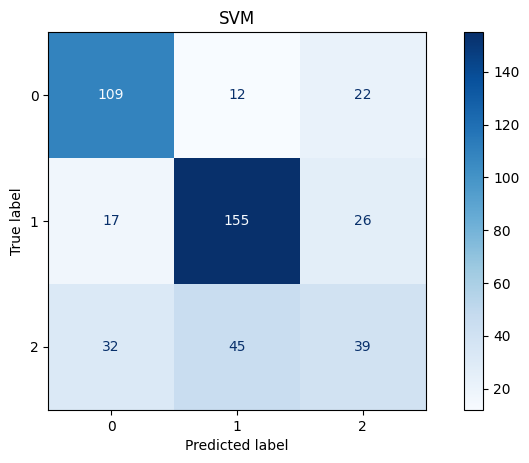

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(1, 1, figsize=(10,5), sharex=True, dpi=100)
plot_confusion_matrix(model, X_test, y_test, ax=axes, cmap='Blues')
axes.set_title('SVM')

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Training
cld_rf = RandomForestClassifier(random_state=42)
parameter_grid = {'max_depth': [2, 4, 5, 8, 10, 15, 20, 25], 
              'n_estimators': [3, 5, 10, 50, 100]}

# k-Fold cross validation
cv = KFold(n_splits=5, 
           random_state=1, 
           shuffle=True)

# Hyperparameters tuning
model1 = GridSearchCV(
    estimator=cld_rf,
    param_grid=parameter_grid,
    scoring="accuracy",
    verbose=0,
    cv=cv
    )

# Entrenamiento
model1.fit(X_val, y_val)
print(model1.best_score_)
print(model1.best_estimator_.get_params())

0.75
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
y_pred1 = model1.predict(X_test)

# Metricas
print("accuracy: ", accuracy_score(y_test, y_pred1))
print( "precision: ", precision_score(y_test, y_pred1, average = 'macro'))
print("recall: ", recall_score(y_test, y_pred1, average = 'macro'))
print( "f1: ", f1_score(y_test, y_pred1, average = 'macro'))

accuracy:  0.6980306345733042
precision:  0.6601160688422083
recall:  0.658892193374952
f1:  0.6551250856913137


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Random Forest')

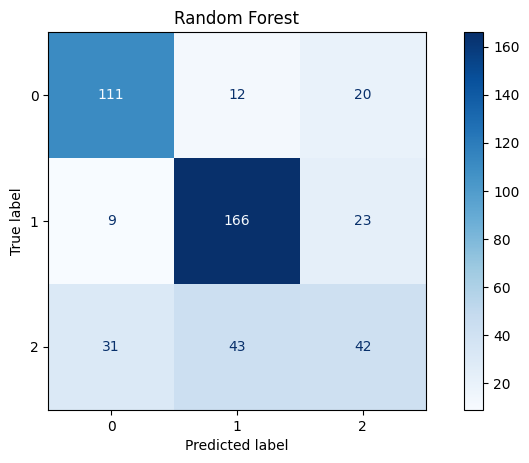

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(1, 1, figsize=(10,5), sharex=True, dpi=100)
plot_confusion_matrix(model1, X_test, y_test, ax=axes, cmap='Blues')
axes.set_title('Random Forest')

**Arbol de decision**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train_sm, y_train_sm)

tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# k-Fold cross validation
cv = KFold(n_splits=5, 
           random_state=1, 
           shuffle=True)

# Hyperparameters tuning
model2 = GridSearchCV(
    estimator=cld_rf,
    param_grid=tree_param,
    scoring="accuracy",
    verbose=0,
    cv=cv
    )

# Entrenamiento
model2.fit(X_val, y_val)
print(model2.best_score_)
print(model2.best_estimator_.get_params())

0.7448979591836734
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
y_pred2 = model2.predict(X_test)

# Metricas
print("accuracy: ", accuracy_score(y_test, y_pred2))
print( "precision: ", precision_score(y_test, y_pred2, average = 'macro'))
print("recall: ", recall_score(y_test, y_pred2, average = 'macro'))
print( "f1: ", f1_score(y_test, y_pred2, average = 'macro'))

accuracy:  0.700218818380744
precision:  0.6646882293500884
recall:  0.6633934392555082
f1:  0.6618333607952985


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Arbol de decision')

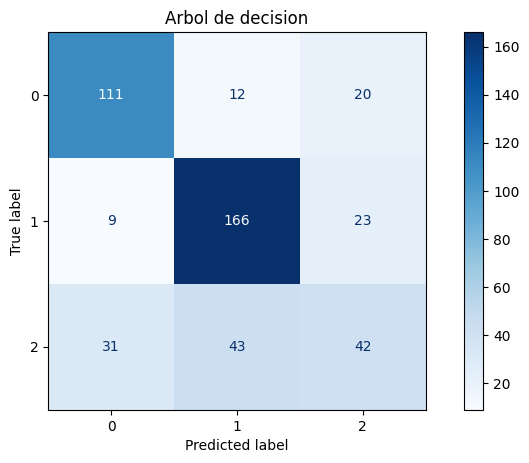

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10,5), sharex=True, dpi=100)
plot_confusion_matrix(model1, X_test, y_test, ax=axes, cmap='Blues')
axes.set_title('Arbol de decision')

De acuerdo a los resultados de los modelos probados con su respectiva validación. El Algoritmo de **Random Forest** y **el Arból de decision** es el que presenta mejores rendimientos de predicción por sobre el SVM. Una hipotesis que me surge al implementar algunos modelos de clasificación , para este caso cuando extraemos la marca de cada equipo , este puede tener caracteristicas básicas como características altas , y una marca puede estar dentro de las 3 categorías que se busca predecir. 

Una forma de tratar que tanto pueden afectar las distintas marcas es hacer un modelo no supervisado e identificar la segmentación de 3 clases. Si bien estas características tienen información detallada como capacidad y componentes, para poder predecir estos es mejor clasificarlos con otras variables como lo serían las capacidades de los componentes ya que solo tengo memoria y ram como variables cuantitativas.

De cierta manera para poder predecir mejor es una alternativa aumentar el numero diferente de equipos y llegar a equipos de gama alta , ya que existe un desbalanceo entre los datos de ciertas clases , por lo que esto puede mejorar en cierta manera el aprendizaje de clasificar un computador segun su rango de precio. 

De acuerdo a los puntajes en caso de poner en producción se escogería en este caso el modelo de árbol de decision. 
